<a href="https://colab.research.google.com/github/nick-volt/Machine_Learnning/blob/master/Flight_Ticket_Participant_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from google.colab.files import upload

In [2]:
upload()
train1=pd.read_excel('Data_Train.xlsx')
test1=pd.read_excel('Test_set.xlsx')
s=pd.read_excel('Sample_submission.xlsx')
train1.head()

Saving Data_Train.xlsx to Data_Train.xlsx
Saving Test_set.xlsx to Test_set.xlsx
Saving Sample_submission.xlsx to Sample_submission.xlsx


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
train1.iloc[6474, 7],test1.iloc[2660, 7] = '24h 5m','24h 5m'
test1.iloc[2664,7] = '24h 5m'

print(test1.iloc[2664, 7])

24h 5m


In [4]:
train1.iloc[2618, 0] = "Jet Airways Business"
train1.iloc[5439, 0] = "Jet Airways Business"
train1.drop(index = 2924, inplace = True, axis = 0)
train1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
train1.Route.fillna('DEL → COK',inplace=True)
train1.Total_Stops.fillna('non-stop',inplace=True)
print(train1.isnull().sum().any())

False


In [6]:
train1.Airline.replace('Trujet','SpiceJet',inplace=True)
train1['Airline'].value_counts()

Jet Airways                          3847
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              819
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    7
Vistara Premium economy                 3
Name: Airline, dtype: int64

In [9]:
train = train1.copy()
test = test1.copy()
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Airline,10682,11,Jet Airways,3847,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date_of_Journey,10682,44,18/05/2019,504,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Source,10682,5,Delhi,4537,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,10682,6,Cochin,4537,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Route,10682,128,DEL → BOM → COK,2376,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dep_Time,10682,222,18:55,233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arrival_Time,10682,1343,19:00,423,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,10682,367,2h 50m,550,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_Stops,10682,5,1 stop,5624,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Additional_Info,10682,10,No info,8345,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
train['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     3
No Info                            3
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [0]:
train['Destination'].replace('New Delhi','Delhi',inplace=True)
test['Destination'].replace('New Delhi','Delhi',inplace=True)

In [12]:
train = pd.DataFrame(data=train.values,columns=train.columns).reset_index().drop('index',axis=1)
test = pd.DataFrame(data=test.values,columns=test.columns).reset_index().drop('index',axis=1)
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [13]:
train['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        2196
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [15]:
train['Total_Stops'].value_counts()
test['Total_Stops'].value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

In [16]:
def Total_Stops(val):
  if val == 'non-stop':
    return 0
  else:
    return int(val.split(' ')[0])
  
train['stop_count']=train['Total_Stops'].apply(Total_Stops)
test['stop_count']=test['Total_Stops'].apply(Total_Stops)
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,stop_count
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,1
4,IndiGo,01/03/2019,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1


In [17]:
train['Source2Destination'] = train['Source'] +'-' + train['Destination']
test['Source2Destination'] = test['Source'] +'-' + test['Destination']

def Dep_Time(val):
  return val.split(':')[0]

def Dep_Time1(val):
  return val.split(':')[1]

def Arrival_Time(val):
  return val.split(':')[0]

def Arrival_Time1(val):
  val2 = val.split(':')[1]
  return val2.split(' ')[0]

train['Dep_Hour'] = train['Dep_Time'].apply(Dep_Time)
train['Dep_Min'] = train['Dep_Time'].apply(Dep_Time1)
train['Arrival_Hour'] = train['Arrival_Time'].apply(Arrival_Time)
train['Arrival_Min'] = train['Arrival_Time'].apply(Arrival_Time1)

test['Dep_Hour'] = test['Dep_Time'].apply(Dep_Time)
test['Dep_Min'] = test['Dep_Time'].apply(Dep_Time1)
test['Arrival_Hour'] = test['Arrival_Time'].apply(Arrival_Time)
test['Arrival_Min'] = test['Arrival_Time'].apply(Arrival_Time1)

train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,stop_count,Source2Destination,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,0,Banglore-Delhi,22,20,01,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2,Kolkata-Banglore,05,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2,Delhi-Cochin,09,25,04,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,1,Kolkata-Banglore,18,05,23,30
4,IndiGo,01/03/2019,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,Banglore-Delhi,16,50,21,35


In [30]:
def isweekday(v):
    if v in [5,6]:
        return 0
    else:
        return 1


df=train.copy()
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])
df['day']=df['Date_of_Journey'].dt.day.astype(str)
df['month']=df['Date_of_Journey'].dt.month.astype(str)
df['week']=df['Date_of_Journey'].dt.week.astype(str)
df['weekday']=df['Date_of_Journey'].dt.weekday.astype(str)
df['isweekday']=df['Date_of_Journey'].dt.weekday.apply(isweekday)

df_test=test.copy()
df_test['Date_of_Journey']=pd.to_datetime(df_test['Date_of_Journey'])
df_test['day']=df_test['Date_of_Journey'].dt.day.astype(str)
df_test['month']=df_test['Date_of_Journey'].dt.month.astype(str)
df_test['week']=df_test['Date_of_Journey'].dt.week.astype(str)
df_test['weekday']=df_test['Date_of_Journey'].dt.weekday.astype(str)
df_test['isweekday']=df_test['Date_of_Journey'].dt.weekday.apply(isweekday)

df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,stop_count,Source2Destination,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,day,month,week,weekday,isweekday
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,0,Banglore-Delhi,22,20,01,10,24,3,12,6,0
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2,Kolkata-Banglore,05,50,13,15,5,1,1,5,0
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2,Delhi-Cochin,09,25,04,25,6,9,36,4,1
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,1,Kolkata-Banglore,18,05,23,30,5,12,49,3,1
4,IndiGo,2019-01-03,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,Banglore-Delhi,16,50,21,35,3,1,1,3,1


In [31]:
def is_premium(val):
  if val in ['Multiple carriers Premium economy','Jet Airways Business','Vistara Premium economy']:
    return 1
  else:
    return 0
  
df['Is_Premium'] = df['Airline'].apply(is_premium)
df_test['Is_Premium'] = df_test['Airline'].apply(is_premium)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,stop_count,Source2Destination,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,day,month,week,weekday,isweekday,Is_Premium
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,0,Banglore-Delhi,22,20,01,10,24,3,12,6,0,0
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2,Kolkata-Banglore,05,50,13,15,5,1,1,5,0,0
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2,Delhi-Cochin,09,25,04,25,6,9,36,4,1,0
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,1,Kolkata-Banglore,18,05,23,30,5,12,49,3,1,0
4,IndiGo,2019-01-03,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,Banglore-Delhi,16,50,21,35,3,1,1,3,1,0


In [32]:
def time_bins(v):
    if v>='00:00' and v<'06:00':
        return 'Morning'
    elif v>='06:00' and v<'12:00':
        return 'Afternoon'
    elif v>='12:00' and v<'18:00':
        return 'Evening'
    elif v>='18:00' and v<='23:60':
        return 'Night'
    else:
        return 'Else'

df['Arrival_Time_bin'] = df['Arrival_Time'].apply(time_bins)
df['Departure_Time_bin'] = df['Dep_Time'].apply(time_bins)

df_test['Arrival_Time_bin'] = df_test['Arrival_Time'].apply(time_bins)
df_test['Departure_Time_bin'] = df_test['Dep_Time'].apply(time_bins)

df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,stop_count,Source2Destination,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,day,month,week,weekday,isweekday,Is_Premium,Arrival_Time_bin,Departure_Time_bin
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,0,Banglore-Delhi,22,20,01,10,24,3,12,6,0,0,Morning,Night
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2,Kolkata-Banglore,05,50,13,15,5,1,1,5,0,0,Evening,Morning
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2,Delhi-Cochin,09,25,04,25,6,9,36,4,1,0,Morning,Afternoon
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,1,Kolkata-Banglore,18,05,23,30,5,12,49,3,1,0,Night,Night
4,IndiGo,2019-01-03,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,Banglore-Delhi,16,50,21,35,3,1,1,3,1,0,Night,Evening


In [33]:
df['Additional_Info'].replace('No Info','No info',inplace=True)
df_test['Additional_Info'].replace('No Info','No info',inplace=True)
df['Additional_Info'].value_counts()
df_test['Additional_Info'].value_counts()

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
Business class                     1
Change airports                    1
1 Long layover                     1
Name: Additional_Info, dtype: int64

In [34]:
df.iloc[3031,15] = 1
df[df['Additional_Info'] == 'Business class']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,stop_count,Source2Destination,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,day,month,week,weekday,isweekday,Is_Premium,Arrival_Time_bin,Departure_Time_bin
3031,Jet Airways,2019-01-03,Banglore,Delhi,BLR → BDQ → DEL,05:50,12:20,6h 30m,1 stop,Business class,28097,1,Banglore-Delhi,05,50,1,20,3,1,1,3,1,0,Evening,Morning
5371,Jet Airways Business,2019-01-03,Banglore,Delhi,BLR → BOM → DEL,05:45,12:25,6h 40m,1 stop,Business class,62427,1,Banglore-Delhi,05,45,12,25,3,1,1,3,1,1,Evening,Morning
10363,Jet Airways Business,2019-01-03,Banglore,Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,57209,1,Banglore-Delhi,09,45,14,25,3,1,1,3,1,1,Evening,Afternoon


In [0]:
df=pd.get_dummies(df,columns=['Date_of_Journey','Additional_Info','Route', 'Airline', 'Destination', 'Duration', 'Source','Source2Destination',
'Total_Stops','stop_count','Arrival_Time_bin','Departure_Time_bin','weekday','month','day','week','Dep_Hour',
'Dep_Min','Arrival_Hour','Arrival_Min'],drop_first=True)

df_test=pd.get_dummies(df_test,columns=['Date_of_Journey','Additional_Info','Route', 'Airline', 'Destination', 'Duration', 'Source','Source2Destination',
'Total_Stops','stop_count','Arrival_Time_bin','Departure_Time_bin','weekday','month','day','week','Dep_Hour',
'Dep_Min','Arrival_Hour','Arrival_Min'],drop_first=True)

In [41]:
len(df.columns) == len(df_test.columns)

False

In [0]:
df.drop(columns=['Dep_Time','Arrival_Time'],axis=1,inplace=True)
df_test.drop(columns=['Dep_Time','Arrival_Time'],axis=1,inplace=True)

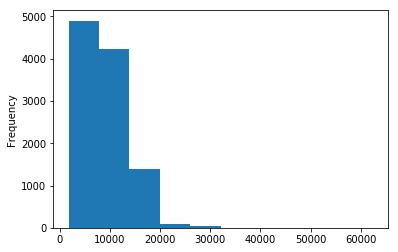

In [46]:
df['Price'].plot.hist();

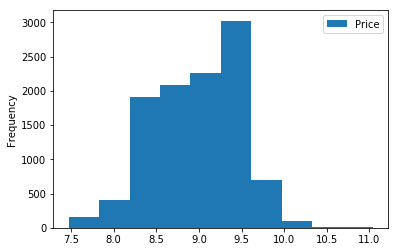

In [48]:
y_logged = np.log1p(df['Price'].astype(np.float64))
pd.DataFrame(y_logged).plot.hist();

In [0]:
from sklearn.model_selection import train_test_split
import math
from sklearn.metrics import accuracy_score,f1_score,mean_squared_error,mean_squared_log_error

X = df.drop('Price',axis=1)

X_train,X_val,y_train,y_val = train_test_split(X,y_logged,test_size=0.25,random_state = 22)

In [61]:
from sklearn.linear_model import LinearRegression

#lin_reg = LinearRegression().fit(X_train,y_train)
linreg   = LinearRegression().fit(X_train, y_train)

print('R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))
print('R-squared score (validation): {:.3f}'.format(linreg.score(X_val, y_val)))

R-squared score (training): 0.903
R-squared score (validation): -149586830616732860416.000


In [0]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train_poly, X_valid_poly, y_train_poly, y_valid_poly = train_test_split(X_poly,y_logged,random_state = 0)

In [0]:
linreg   = LinearRegression().fit(X_train_poly, y_train)

print('R-squared score (training): {:.3f}'.format(linreg.score(X_train_poly, y_train)))
print('R-squared score (validation): {:.3f}'.format(linreg.score(X_valid_poly, y_valid_poly)))

In [60]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=1)
lasso_reg.fit(X_train,y_train)

print('Training Score : {:.3f}'.format(lasso_reg.score(X_train,y_train)))
print('Testing Score : {:.3f}'.format(lasso_reg.score(X_val,y_val)))

Training Score : 0.000
Testing Score : -0.000


In [59]:
from sklearn.linear_model import Ridge

Ridge_reg = Ridge(alpha=1)
Ridge_reg.fit(X_train,y_train)

print('Training Score : {:.3f}'.format(Ridge_reg.score(X_train,y_train)))
print('Testing Score : {:.3f}'.format(Ridge_reg.score(X_val,y_val)))

Training Score : 0.903
Testing Score : 0.884


In [0]:
from sklearn.ensemble import RandomForestRegressor


In [0]:
from sklearn.tree import DecisionTreeRegressor


In [0]:
# Regression Algorithms

from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import RidgeCV,BayesianRidge
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [0]:
lin_reg = LinearRegression().fit(X_train,y_train)

print('Training Score {:.3f}'.format(lin_reg.score(X_train,y_train)))
print('Testing Score {:.3f}'.format(lin_reg.score(X_val,y_val)))

pred = lin_reg.predict(X_val)

#print(np.sqrt(mean_squared_log_error(np.expm1(y_val),np.expm1(pred))))

Training Score 0.884
Testing Score -392774618462882758656.000
